In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Client A
- Predict sales 2020 based on 2017-2019 data
- Sales in previous years, divide into quarters, counties, simplified alc category namd, bottle volume

Overall, we are predicting total sales in dollars using:
- Month
- County
- Amount of each type of liquor (???)
- Amount of each volume of liquor (small, medium, large)
- Amount of each cost bracket of liquor (cheap, normal, expensive)
- Amount of each pack size (single, full pack)

Each row is a store-month

In [23]:
caseys = pd.read_csv("Iowa_Liquor_Sales_Caseys.csv")
caseys

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Iowa ZIP Code Tabulation Areas,Iowa Watershed Sub-Basins (HUC 08),Iowa Watersheds (HUC 10),County Boundaries of Iowa,US Counties
0,INV-02512900002,01/03/2017,4492,CASEY'S GENERAL STORE #2773 / CEDAR RAPIDS,3625 EDGEWOOD RD SW,CEDAR RAPIDS,52404.0,POINT (-91.715911 41.94236600000001),57.0,LINN,...,12.00,24,288.00,9.00,2.38,793.0,18.0,263.0,45.0,287.0
1,INV-02512900012,01/03/2017,4492,CASEY'S GENERAL STORE #2773 / CEDAR RAPIDS,3625 EDGEWOOD RD SW,CEDAR RAPIDS,52404.0,POINT (-91.715911 41.94236600000001),57.0,LINN,...,6.00,12,72.00,9.00,2.38,793.0,18.0,263.0,45.0,287.0
2,INV-02511700001,01/03/2017,4623,CASEY'S GENERAL STORE #1493 / VAN METER,700 DEBRA DR,VAN METER,50261.0,POINT (-93.951253 41.533177),25.0,DALLAS,...,23.39,6,135.66,4.50,1.19,760.0,27.0,333.0,62.0,1746.0
3,INV-02512900009,01/03/2017,4492,CASEY'S GENERAL STORE #2773 / CEDAR RAPIDS,3625 EDGEWOOD RD SW,CEDAR RAPIDS,52404.0,POINT (-91.715911 41.94236600000001),57.0,LINN,...,2.70,24,64.80,9.00,2.38,793.0,18.0,263.0,45.0,287.0
4,INV-02503400014,01/03/2017,4487,CASEY'S GENERAL STORE #2787 / CEDAR RAPIDS,1661 32ND ST NE,CEDAR RAPIDS,52402.0,POINT (-91.662119 42.010447),57.0,LINN,...,7.13,12,85.56,4.50,1.19,196.0,18.0,264.0,45.0,287.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396256,INV-33162600012,12/31/2020,4753,CASEY'S GENERAL STORE #2521 / ADAIR,110 S 5TH ST,ADAIR,50002.0,POINT (-93.300253 41.013948),1.0,ADAIR,...,8.25,6,49.50,2.25,0.59,446.0,29.0,354.0,87.0,288.0
396257,INV-33139900003,12/31/2020,5615,CASEY'S GENERAL STORE #2520 / GRIMES,206 E 1ST ST,GRIMES,50111.0,POINT (-93.79323800000002 41.688401000000006),77.0,POLK,...,14.13,2,28.26,1.50,0.39,654.0,25.0,315.0,64.0,1878.0
396258,INV-33164400010,12/31/2020,5177,CASEY'S GENERAL STORE #3204 / MINDEN,33280 335TH ST,MINDEN,51553.0,POINT (-95.546176 41.496153),78.0,POTTAWATTAMIE,...,7.85,12,94.20,9.00,2.37,840.0,42.0,250.0,69.0,1879.0
396259,INV-33164000073,12/31/2020,5342,CASEY'S GENERAL STORE # 3509/ CARTER LAKE,1650 E LOCUST ST,CARTER LAKE,51510.0,POINT (-95.910056 41.284953),78.0,POTTAWATTAMIE,...,23.36,4,93.44,3.00,0.79,781.0,40.0,437.0,69.0,1879.0


In [68]:
df_train = caseys.loc[:, ['Store Number', 'Date', 'County', 'Pack', 'Bottle Volume (ml)', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)']]
df_train['Month'] = pd.to_datetime(df_train['Date']).dt.month
df_train['Year'] = pd.to_datetime(df_train['Date']).dt.year
df_train['Full Packs Sold'] = df_train['Bottles Sold'] // df_train['Pack']
df_train['Single Bottles Sold'] = df_train['Bottles Sold'] % df_train['Pack']
df_train['Bottle Size Category'] = pd.cut(x=df_train['Bottle Volume (ml)'],
                                          bins=[0, 750, np.infty],
                                          labels = ["small", "large"])
df_train['Bottle Price Category'] = pd.cut(x=df_train['State Bottle Retail'],
                                          bins=[0, 25, 75, np.infty],
                                          labels = ["cheap", "normal", "expensive"])
df_train.sort_values(['Store Number', 'Year', 'Month'], inplace=True)
df_train

,Store Number,Date,County,Pack,Bottle Volume (ml),State Bottle Retail,Bottles Sold,Sale (Dollars),Month,Year,Full Packs Sold,Single Bottles Sold,Bottle Size Category,Bottle Price Category
415,4463,01/06/2017,HANCOCK,12,750,12.38,3,37.14,1,2017,0,3,medium,cheap
436,4463,01/06/2017,HANCOCK,6,1750,10.76,6,64.56,1,2017,1,0,large,cheap
489,4463,01/06/2017,HANCOCK,12,750,7.50,3,21.39,1,2017,0,3,medium,cheap
522,4463,01/06/2017,HANCOCK,6,1750,10.38,6,62.28,1,2017,1,0,large,cheap
529,4463,01/06/2017,HANCOCK,6,1750,10.80,6,64.80,1,2017,1,0,large,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390466,6064,12/18/2020,POLK,12,50,10.95,12,131.40,12,2020,1,0,small,cheap
390474,6064,12/18/2020,POLK,12,50,13.31,12,159.72,12,2020,1,0,small,cheap
390493,6064,12/18/2020,POLK,12,375,8.25,6,49.50,12,2020,0,6,small,cheap
390494,6064,12/18/2020,POLK,5,50,44.30,5,221.50,12,2020,1,0,small,normal


In [94]:
agg_1 = df_train[['Store Number', 'Year', 'Month', 'Bottle Size Category']].value_counts().sort_index().unstack().reset_index()
agg_1

Bottle Size Category,Store Number,Year,Month,small,medium,large
0,4463,2017,1,15.0,42.0,49.0
1,4463,2017,2,19.0,48.0,53.0
2,4463,2017,3,23.0,60.0,56.0
3,4463,2017,4,27.0,60.0,45.0
4,4463,2017,5,24.0,57.0,63.0
...,...,...,...,...,...,...
13159,6059,2020,12,2.0,2.0,NaN
13160,6063,2020,10,30.0,33.0,6.0
13161,6063,2020,11,3.0,1.0,NaN
13162,6063,2020,12,3.0,6.0,1.0


In [95]:
agg_2 = df_train[['Store Number', 'Year', 'Month', 'Bottle Price Category']].value_counts().sort_index().unstack().reset_index()
agg_2

Bottle Price Category,Store Number,Year,Month,cheap,normal,expensive
0,4463,2017,1,100.0,6.0,NaN
1,4463,2017,2,112.0,8.0,NaN
2,4463,2017,3,131.0,8.0,NaN
3,4463,2017,4,123.0,9.0,NaN
4,4463,2017,5,133.0,11.0,NaN
...,...,...,...,...,...,...
13159,6059,2020,12,4.0,NaN,NaN
13160,6063,2020,10,65.0,4.0,NaN
13161,6063,2020,11,4.0,NaN,NaN
13162,6063,2020,12,10.0,NaN,NaN


In [96]:
agg_3 = df_train[['Store Number', 'Year', 'Month', 'Full Packs Sold', 'Single Bottles Sold', 'Sale (Dollars)']].groupby(['Store Number', 'Year', 'Month']).sum().reset_index()
agg_3

,Store Number,Year,Month,Full Packs Sold,Single Bottles Sold,Sale (Dollars)
0,4463,2017,1,88,110,10317.89
1,4463,2017,2,86,139,10824.47
2,4463,2017,3,101,161,12745.05
3,4463,2017,4,99,161,12401.86
4,4463,2017,5,114,158,14075.23
...,...,...,...,...,...,...
13159,6059,2020,12,8,0,1225.80
13160,6063,2020,10,45,168,7489.36
13161,6063,2020,11,5,0,1018.68
13162,6063,2020,12,9,10,1592.96


In [97]:
df_agg = agg_3.merge(agg_1, how="left", on=['Store Number', 'Year', 'Month']).merge(agg_2, how="left", on=['Store Number', 'Year', 'Month'])
df_agg.sort_values(['Store Number', 'Year', 'Month'])

,Store Number,Year,Month,Full Packs Sold,Single Bottles Sold,Sale (Dollars),small,medium,large,cheap,normal,expensive
0,4463,2017,1,88,110,10317.89,15.0,42.0,49.0,100.0,6.0,NaN
1,4463,2017,2,86,139,10824.47,19.0,48.0,53.0,112.0,8.0,NaN
2,4463,2017,3,101,161,12745.05,23.0,60.0,56.0,131.0,8.0,NaN
3,4463,2017,4,99,161,12401.86,27.0,60.0,45.0,123.0,9.0,NaN
4,4463,2017,5,114,158,14075.23,24.0,57.0,63.0,133.0,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13159,6059,2020,12,8,0,1225.80,2.0,2.0,NaN,4.0,NaN,NaN
13160,6063,2020,10,45,168,7489.36,30.0,33.0,6.0,65.0,4.0,NaN
13161,6063,2020,11,5,0,1018.68,3.0,1.0,NaN,4.0,NaN,NaN
13162,6063,2020,12,9,10,1592.96,3.0,6.0,1.0,10.0,NaN,NaN


<Axes: xlabel='Month', ylabel='Sale (Dollars)'>

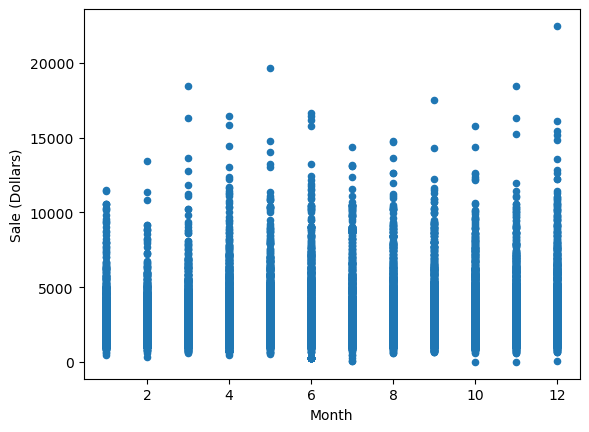

In [101]:
df_agg[['Month', 'Sale (Dollars)']].plot.scatter('Month', 'Sale (Dollars)')